<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

# TFM - Sistema de alerta ante la presencia de Didymosphenia Geminata en agua dulce con técnicas de inteligencia artificial

Presentado por: Aracena Vallejos, Estefania – Medina Jiménez, Lenin  
Directora: Prados Privado, María

## Ensembled Learning - Random Forest

El objetivo implementar un modelo de predicción para el crecimiento de Didymo en los sistemas hídricos de Chile, utilizando el método Random Forest. El conjunto de datos utilizado fue proporcionado por el Instituto de Fomento Pesquero de Puerto Montt, y se centra en las siguientes clases: 
> Crec_alga_Ausent: representa la ausencia de crecimiento del Didymo en el sistema hídrico.  
> Crec_alga_Inicial: indica un nivel inicial de crecimiento del Didymo.   
> Crec_alga_Mediana: representa un nivel intermedio de crecimiento del Didymo.  
> Crec_alga_Alta: indica un nivel alto de crecimiento del Didymo.  
> Crec_alga_Muy_Alta: representa el nivel más alto de crecimiento del Didymo



## Importación de librerias necesarias

In [1]:
#Para esta actividad se importarán las siguientes librerías:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from itertools import cycle
import seaborn as sns

## Cargar el Dataset

In [3]:
# Carda de datos para realizar EDA
dataset = pd.read_csv("data.csv", delimiter=';')
dataset.head()

,Unnamed: 0,T°,categoria,pH,Ce,TDS,OD,%Sat. O,Ca,PO4,...,Crec_algal_Inicial,Crec_algal_Mediana,Crec_algal_Alta,Crec_algal_Muy Alta,%Cob_algal_ausente,%Cob_algal_Pequenas colonias,%Cob_algal_Mediana,%Cob_algal_Alta,%Cob_algal_Muy Alta,Didymo
0,0,14.8,%Cob_algal_Alta,8.2,80.0,40.0,11.8,118.4,7.9,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,15.6,%Cob_algal_Alta,6.7,73.0,36.0,12.2,124.2,9.2,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,11.1,%Cob_algal_Alta,7.1,152.0,76.0,10.0,101.5,5.5,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,15.2,%Cob_algal_Alta,7.8,82.0,13.8,11.8,111.8,4.2,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,13.9,%Cob_algal_Muy Alta,7.4,31.0,15.0,10.4,102.3,4.5,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modelo con Random Forest

In [4]:
columnas = ['T°', 'pH', 'Ce', 'TDS', 'OD', '%Sat. O', 'Ca', 'PO4', 'P T', 'Fe',
       'NO3', 'NO2', 'NT', 'NKT', 'Si T', 'Turbidez', 'Didymo', 'Crec_algal_Ausente',
       'Crec_algal_Inicial', 'Crec_algal_Mediana', 'Crec_algal_Alta',
       'Crec_algal_Muy Alta']

In [5]:
dataset_randonF = dataset[columnas]
dataset_randonF

,T°,pH,Ce,TDS,OD,%Sat. O,Ca,PO4,P T,Fe,...,NT,NKT,Si T,Turbidez,Didymo,Crec_algal_Ausente,Crec_algal_Inicial,Crec_algal_Mediana,Crec_algal_Alta,Crec_algal_Muy Alta
0,14.8,8.2,80.0,40.0,11.8,118.4,7.9,1.000,0.6000,0.021,...,2.900,2.900,1.0,0.7,0.00,0.0,0.0,1.0,0.0,0.0
1,15.6,6.7,73.0,36.0,12.2,124.2,9.2,1.000,0.7000,0.021,...,4.600,4.600,21.5,0.2,0.00,0.0,0.0,0.0,1.0,0.0
2,11.1,7.1,152.0,76.0,10.0,101.5,5.5,1.000,0.2000,0.021,...,1.900,1.900,22.7,0.2,0.00,0.0,0.0,1.0,0.0,0.0
3,15.2,7.8,82.0,13.8,11.8,111.8,4.2,1.000,1.0000,0.021,...,2.000,2.000,14.9,0.3,0.00,0.0,1.0,0.0,0.0,0.0
4,13.9,7.4,31.0,15.0,10.4,102.3,4.5,1.000,0.2000,0.021,...,2.000,2.000,9.0,0.6,0.00,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,6.0,7.5,44.0,22.0,18.8,117.3,8.3,0.151,0.0336,0.036,...,0.278,0.226,15.4,1.1,9.51,0.0,1.0,0.0,0.0,0.0
1601,13.5,7.5,49.0,25.0,11.4,109.7,6.0,0.001,0.0004,0.015,...,0.080,0.022,10.3,0.4,0.00,0.0,1.0,0.0,0.0,0.0
1602,11.7,7.4,74.0,37.0,11.3,105.9,5.3,0.001,0.0004,0.018,...,0.070,0.027,16.9,0.6,0.00,0.0,1.0,0.0,0.0,0.0
1603,7.0,7.4,39.0,19.0,13.3,118.4,8.3,0.151,0.0336,0.036,...,0.278,0.226,15.4,1.1,9.51,0.0,1.0,0.0,0.0,0.0


In [6]:
# Obtenemos una descripsión del dataset
dataset_randonF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   T°                   1605 non-null   float64
 1   pH                   1605 non-null   float64
 2   Ce                   1605 non-null   float64
 3   TDS                  1605 non-null   float64
 4   OD                   1605 non-null   float64
 5   %Sat. O              1605 non-null   float64
 6   Ca                   1605 non-null   float64
 7   PO4                  1605 non-null   float64
 8   P T                  1605 non-null   float64
 9   Fe                   1605 non-null   float64
 10  NO3                  1605 non-null   float64
 11  NO2                  1605 non-null   float64
 12  NT                   1605 non-null   float64
 13  NKT                  1605 non-null   float64
 14  Si T                 1605 non-null   float64
 15  Turbidez             1605 non-null   f

In [7]:
# Definir las características (X) y la variable objetivo (y)
X = dataset_randonF.drop(['Crec_algal_Ausente', 'Crec_algal_Inicial', 'Crec_algal_Mediana', 'Crec_algal_Alta', 'Crec_algal_Muy Alta'], axis=1)
y = dataset_randonF[['Crec_algal_Ausente', 'Crec_algal_Inicial', 'Crec_algal_Mediana', 'Crec_algal_Alta', 'Crec_algal_Muy Alta']]

In [8]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
# Ajustar el modelo al conjunto de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Predecir las clases en el conjunto de prueba
y_pred = rf_model.predict(X_test)

In [12]:
# Suponiendo que 'y_test' y 'y_pred' son matrices de etiquetas multilabel
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión por etiqueta, recall por etiqueta y puntuación F1 por etiqueta
print('Classification Report:')
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy}')


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        48
           1       0.48      0.26      0.34       124
           2       0.25      0.03      0.05        78
           3       0.00      0.00      0.00        34
           4       1.00      0.04      0.07        28

   micro avg       0.47      0.12      0.19       312
   macro avg       0.55      0.07      0.10       312
weighted avg       0.50      0.12      0.16       312
 samples avg       0.11      0.11      0.11       312

Accuracy: 0.1308411214953271


c:\Users\earac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\earac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\earac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [13]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[42 15  1  0  0]
 [89 32  3  0  0]
 [61 14  2  0  0]
 [30  2  2  0  0]
 [24  3  0  0  1]]


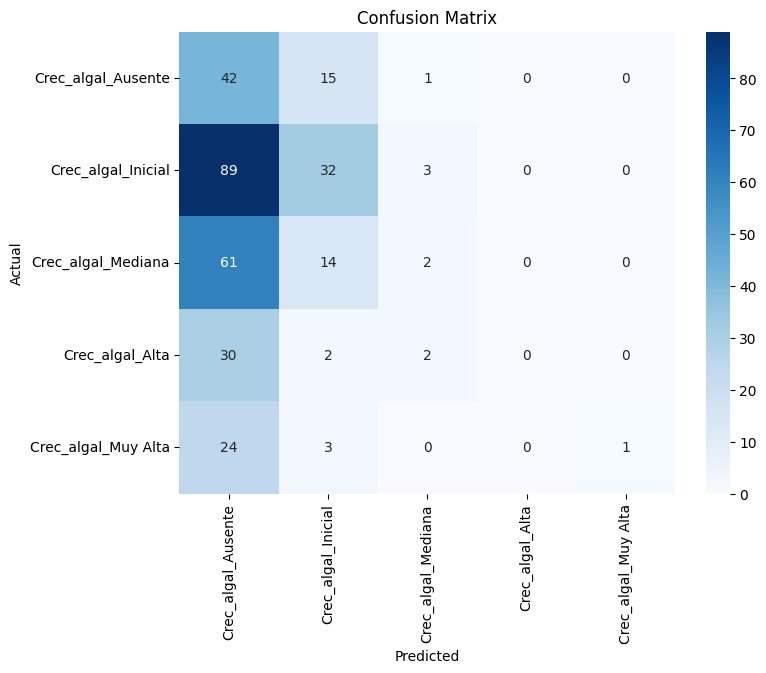

In [14]:
# Plotear la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.columns, yticklabels=y.columns)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

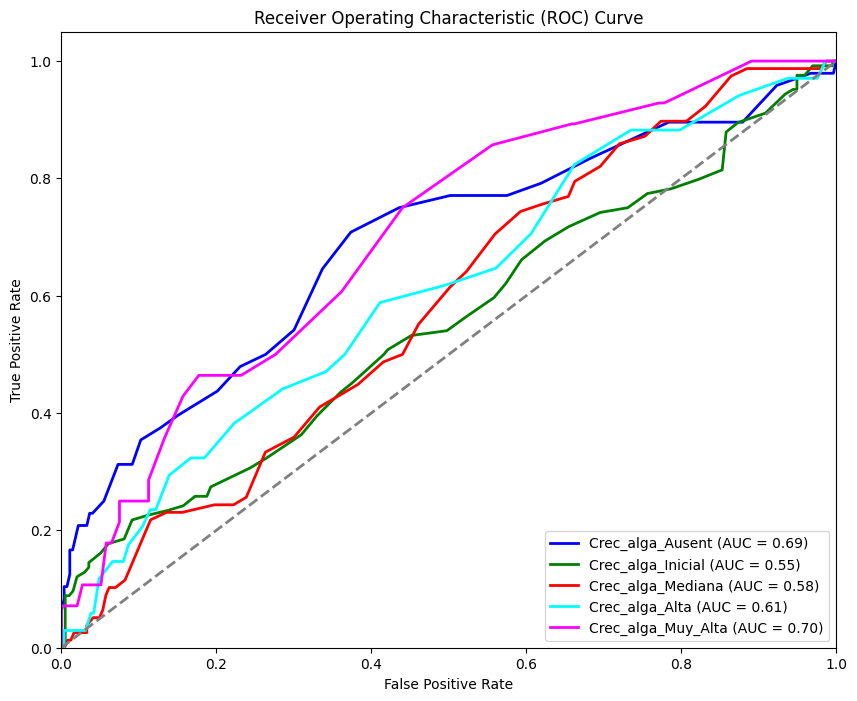

In [15]:
# Obtener la curva ROC para cada clase
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = len(y.columns)

# Ajustar la forma de y_pred_prob
y_pred_prob = np.array(rf_model.predict_proba(X_test)).transpose((1, 0, 2))

# Lista de nombres de clases
class_names = ["Crec_alga_Ausent", "Crec_alga_Inicial", "Crec_alga_Mediana", "Crec_alga_Alta", "Crec_alga_Muy_Alta"]

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i, 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotear la curva ROC para cada clase
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('rf.jpg')
plt.show()


In [16]:
# Obtener la curva ROC para cada clase
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = len(y.columns)

# Ajustar la forma de y_pred_prob
y_pred_prob = np.array(rf_model.predict_proba(X_test)).transpose((1, 0, 2))

# Lista de nombres de clases
class_names = ["Crec_alga_Ausent", "Crec_alga_Inicial", "Crec_alga_Mediana", "Crec_alga_Alta", "Crec_alga_Muy_Alta"]

# Inicializar listas para almacenar datos de la tabla
table_data = {'Class': [], 'AUC': []}

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i, 1])
    roc_auc = auc(fpr, tpr)
    
    # Agregar datos a las listas
    table_data['Class'].append(class_names[i])
    table_data['AUC'].append(roc_auc)

    # Resto del código para graficar (como en el ejemplo anterior)

# Crear un DataFrame desde los datos
roc_table = pd.DataFrame(table_data)

# Imprimir la tabla
print(roc_table)




                Class       AUC
0    Crec_alga_Ausent  0.686012
1   Crec_alga_Inicial  0.552542
2   Crec_alga_Mediana  0.581909
3      Crec_alga_Alta  0.609397
4  Crec_alga_Muy_Alta  0.700085


In [17]:
info1 = pd.DataFrame({'Model':['RFC'],
                      'Test ACC':[accuracy*100]}).round(decimals=2)
info1.style.highlight_max(color="green")

,Model,Test ACC
0,RFC,13.080000
